<center > <h2>EL PROBLEMA DEL COLECCIONISTA</h2><center>
<center><h5>Versión Álbum del FIFA World Cup Qatar 2022™ de Panini</h5></center>
<center>Mauricio Conde - Matías Zieleniec</center>



En este proyecto se trata de estimar la cantidad de sobres necesarios para completar el Álbum del Mundial de Catar 2022 en función de varios factores. El principal factor es la cantidad de personas con las que se intercambian las figuritas repetidas, ¿cuál es el promedio de sobres necesarios para completar el álbum si se colecciona con un grupo de 10 personas?, ¿y de a 5?, ¿y solo? Estas preguntas y más tratamos de responder a lo largo de este informe.

Para fijar ideas y poner algunas cosas en común debemos de tener en cuenta algunos factores:

- El álbum cuenta con 670 cromos \(sin contar las legendarias, que no fueron tomadas en cuenta para esta investigación\).
- Según Panini —la empresa que comercializa el álbum— no hay figuritas más difíciles de conseguir que otras, por lo tanto asumimos que todas son equiprobables.  



**Tema:** Colección del álbum de figuritas del mundial

**Grupo:** Mauricio Conde y Matías Zieleniec

**Objetivos:**  Estudiar cuantas figuritas \(sobres\) llevaria completar el album en distintos casos.

**Asumimos:** Todas las figuritas son equiprobables, eliminamos las extras \(ya que complejizarían mucho el modelo\), en un sobre todas las figuritas son distintas, y  
que toda figurita cumple su función \(no se rompe, pierde, se pega, etc\). Además en los cambios solo se intercambian repetidas por faltantes.

**Casos:**

1. Colección individual, sin cambiar figuritas. Estudiar esperanza y varianza del mismo simulando varios casos. De este estudiar su comportamiento de forma matemática y comparar con lo obtenido.
2. Colección cambiando figuritas con "n" personas. Observar como afecta esto la cantidad de figuritas necesarias para completar si cambiamos las repetidas. Estudiar tendencias con el crecimiento de n. Ver tambien que pasa con  
   el ritmo en el que uno va comprando figuritas \(sobres\), ¿qué tanto afecta el llenado?
3. Colección mas realista donde se intercambian figuritas repetidas y además hay figuritas mas valiosas que las otras \(tal como brillantes, messi, uruguayos, etc\).
4. Cuantas veces le puede llegar a tocar una figurita a una persona \(Si da el tiempo\).

**Linea de tiempo**

1. Hablar con alguien que se especialice en probabilidad para que nos oriente en hacer un modelo matematico parecido a [https://en.wikipedia.org/wiki/Coupon\_collector's\_problem](https://en.wikipedia.org/wiki/Coupon_collector's_problem) de cuanto sería la esperanza y varianza del llenado con sobres. Que cheque si nuestras cuentas iniciales están bien \(en cuanto antes\).
2. Hacer el primer algoritmo y hacer conclusiones, graficar y demás \(10/10 hasta 16/10\).
3. Hacer el segundo \(17/10 al 27/10\).
4. Hacer el tercero \(28/10 al 4/11\).
5. Y evaluar la pregunta \(al final\).

**Producto final**

Presentación con algoritmos, gráficos, resultados, análisis matemático e imágenes ilustrativas.  



Bibliografía:

- Cardiff University \- World Cup stickers \(2018\) \- [https://www.cardiff.ac.uk/news/view/1136091\-world\-cup\-stickers](https://www.cardiff.ac.uk/news/view/1136091-world-cup-stickers)
- Infobae \- El álbum del Mundial 2022 \(2022\) \- [https://www.infobae.com/economia/2022/08/24/el\-album\-del\-mundial\-2022\-como\-es\-la\-mejor\-estrategia\-para\-llenarlo\-al\-costo\-mas\-bajo/](https://www.infobae.com/economia/2022/08/24/el-album-del-mundial-2022-como-es-la-mejor-estrategia-para-llenarlo-al-costo-mas-bajo/)  



### <span style='color:#f44336'>Paquetes necesarios</span>



In [1]:
import random # Necesario para abrir sobres, está acá para no tener que ejecutarlo tantas veces innecesariamente.
import numpy as np # Necesario para hacer promedio en la parte de histograma.
import matplotlib # Necesario para los colores de cada coleccionista en la función coleccion()
import matplotlib.pyplot as plt
import multiprocessing # https://www.cienciadedatos.net/documentos/py12-paralelizar-con-python.html
global M # En esta lista almacenaremos coleccionistas. Lo utilizaremos más adelante.

### <span style='color:#16a5a5'>Algoritmo 1: Llenado individual</span>



In [2]:
def completo(M,i):
    lleno= True
    j=0
    filas, columnas = M.dimensions()
    while lleno and j< columnas:
        if M[i,j]==0:
            lleno= False
        else:
            j=j+1
    return lleno

In [3]:
def coleccion(fig,sob = 1,graf = False,rep = False):

    """
    Simula la cantidad de sobres de figuritas necesarios para completar un álbum.

    ARGUMENTOS:

    * "fig" -- cantidad de figuritas diferentes necesarias para llenar el álbum.

    * "sob" -- cantidad de figuritas que vienen en cada sobre.

    * "graf" -- (booleano) representa si se imprime una gráfica que representa la cantidad de figuritas diferentes obtenidas en función del tiempo. Este argumento es opcional y está predefinido en "False".

    * "rep" -- (booleano) representa si en cada sobre pueden encontrarse figuritas repetidas. Este argumento es opcional y está predefinido en "False".

    SALIDA:

    Un entero que representa la cantidad de sobres que se necesitaron para completar el álbum.

    En caso de que "graf" sea "True" incluirá una gráfica que representa la cantidad de figuritas diferentes obtenidas en función del tiempo.
    """
    M= zero_matrix(1,fig)
    l=[i for i in range(0,fig)]
    if rep:
        cont=0
        s=0
        r=[0] # Lista que almacena la cantidad de figuritas pegadas sobre por sobre.
        while not completo(M,0):
            g=random.choices(l,k = sob)
            for i in range (0,sob):
                M[0,g[i]]=M[0,g[i]]+1
            cont=cont+1
            s=0
            for h in range(0, fig): # Cantidad de figuritas pegadas.
                if M[0,h] > 0:
                    s = s+1
            r.append(s)
    else:
        cont=0
        s=0
        r=[0] # Lista que almacena la cantidad de figuritas pegadas sobre por sobre.
        while not completo(M,0):
            g= random.sample(l,sob)
            for i in range (0,sob):
                M[0,g[i]]=M[0,g[i]]+1
            cont=cont+1
            s=0
            for h in range(0, fig): # Cantidad de figuritas pegadas.
                if M[0,h] > 0:
                    s = s+1
            r.append(s)
    if graf:
        import matplotlib.pyplot as plt
        plt.plot(r, color='magenta', marker='o',mfc='pink' )
    return(cont)

287

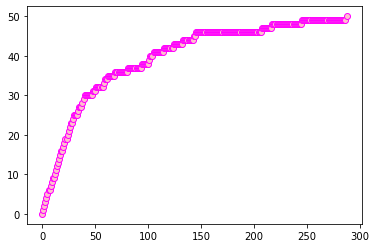

In [15]:
coleccion(50,1,True,True)

421

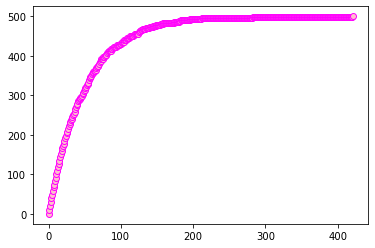

In [46]:
coleccion(500,10,True,False)

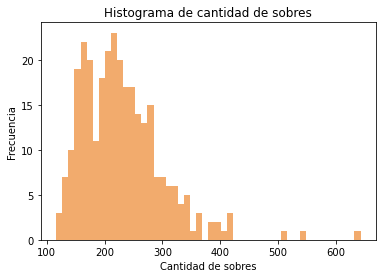

229.61666666666667

In [21]:
l=[]
for i in range(300):
    l.append(coleccion(50,1,False,False))
plt.hist(l, bins=50, color='#F2AB6D', rwidth=10000)
plt.title('Histograma de cantidad de sobres')
plt.xlabel('Cantidad de sobres')
plt.ylabel('Frecuencia')


plt.show() 

np.mean(l)
#La esperanza es 225 y sa bastante cerca

916

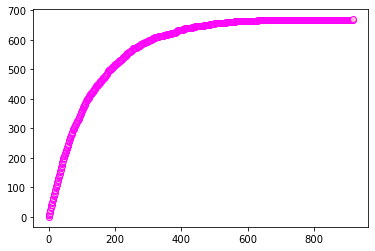

In [22]:
#Llenado de figuritas del album Qatar 2022, sin repetidas por sobre
coleccion(670,5,True,False)

888

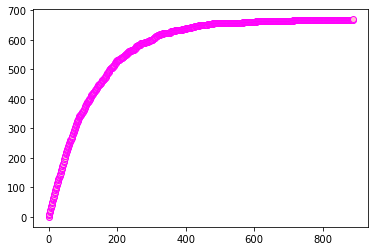

In [23]:
#Llenado de figuritas del album Qatar 2022, con repetidas por sobre
coleccion(670,5,True,True)

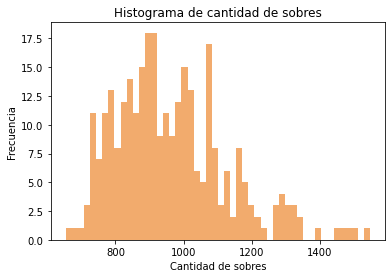

963.5566666666666

In [24]:
l=[]
for i in range(300):
    l.append(coleccion(670,5,False,False))
plt.hist(l, bins=50, color='#F2AB6D', rwidth=10000)
plt.title('Histograma de cantidad de sobres')
plt.xlabel('Cantidad de sobres')
plt.ylabel('Frecuencia')


plt.show() 

np.mean(l)
#La esperanza es mayor a 900...

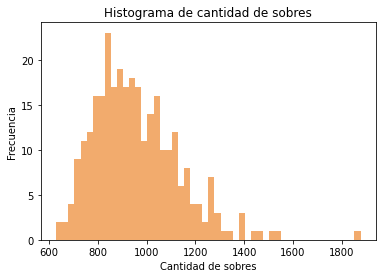

958.1233333333333

In [7]:
l=[]
for i in range(300):
    l.append(coleccion(670,5,False,True))
plt.hist(l, bins=50, color='#F2AB6D', rwidth=10000)
plt.title('Histograma de cantidad de sobres')
plt.xlabel('Cantidad de sobres')
plt.ylabel('Frecuencia')


plt.show() 

np.mean(l)
#La esperanza es mayor a 900...

In [45]:
def segun_figuritas(fig:list, repeticiones: int = 15, graficar:bool=True):
    """
    Repite 'repeticiones' veces una colección para cada persona en 'personas'.

    ARGUMENTOS:

    * "personas" -- intervalo de personas que se graficará.

    * "sob" -- cantidad de figuritas por sobre.

    * "fig" -- cantidad total de figuritas para completar el álbum.

    SALIDA:

    Un gráfico de barras comparativo entre los promedios de sobres necesarios por personas.

    """
    prom = [] # Lista que almacenará los promedios para cada persona.
    observaciones = []
    for i in fig:
        valores = [i for j in range(repeticiones)]
        pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
        resultados = pool.map(coleccion, valores)
        prom.append(np.mean(resultados))
        observaciones.append(i)
    if graficar:
        fig, axes = plt.subplots(figsize=(7,5), dpi=90)
        plt.bar(observaciones, prom)
        plt.ylabel('Número figuritas esperado')
        plt.xlabel('Cantidad de figuritas')
        plt.title('Comparacion segun el numero de figuritas')
    else:
        return prom

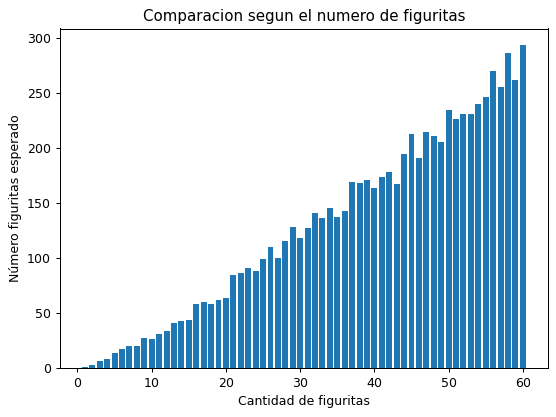

In [46]:
segun_figuritas([1..60])

#### ¿Cuál es la diferencia entre sobres con repetidas y sobres sin repetidas?



In [8]:
l=[]
k= []
for i in range(300):
    l.append(coleccion(670,5,False,False))
    k.append(coleccion(670,5,False,True))
m= np.mean(l)
n= np.mean(k)
print("La esperanza de llenado con repetidas es: ", n, " y sin repetidas es: ", m)

La esperanza de llenado con repetidas es:  956.6666666666666  y sin repetidas es:  942.32


In [45]:
l=[]
k= []
for i in range(300):
    l.append(coleccion(200,100,False,False))
    k.append(coleccion(200,100,False,True))
m= np.mean(l)
n= np.mean(k)
print("La esperanza de llenado con repetidas es: ", n, " y sin repetidas es: ", m)
# Veamos que con una cantidad de figuritas no tan grande en comparación a la de figuritas por sobre, la diferencia de las esperanzas es bastante mayor en porcentaje

La esperanza de llenado con repetidas es:  12.44  y sin repetidas es:  8.976666666666667


#### <span style='color:#009ce0'>Conclusión Algoritmo 1:</span>

Podemos observar que sin importar si hay repetidas en los sobre o no, la esperanza de llenado parece ser similar en ambos casos \(esto cuando el numero de figuritas es considerablemente mayor que el numero de figuritas por sobre\). Además la esperanza de llenado esta cerca de 950 sobres \(notar que la varianza de este experimento debe ser grande ya que al correr los experimentos con 300 repeticiones varias veces los resultados difieren bastante\), coincidiendo con el "coupons collector problem" de Wikipedia. También es importante decir que más allá del numero de figuritas que tengamos o figuritas por sobre o si hay repetidas en los sobres o no, todas tienen una forma logarítmica en su parte gráfica.  



In [1]:
#Vamos a mostrar que el coupons colector problem da parceido
num= 670
i = var("i")
round(num*sum(1/i,i,1,num).n()/5)

949

### <span style='color:#009688'>Algoritmo 2: Coleccionistas intercambiando figurita a figurita</span>



A continuación se define la clase `Coleccionista` que crea objetos que representan a un coleccionista de figuritas \(del FIFA World Cup Qatar 2022™ de Panini en nuestro caso\).

Cada objeto de esta clase \(cada coleccionista\) posee los siguientes objetos:

- `album`una lista que representa los lugares del álbum de figuritas \(la colección\).
- `repetidas`una lista que lleva el control de las repetidas del coleccionista.
- `faltantes`una lista que lleva el control de las faltantes del coleccionista.

A su vez, cada coleccionista puede realizar las siguientes acciones:

- `abrir_sobre()`abre un sobre que contiene una cantidad de figuritas previamente declarada.
- `pegar_fig()`pega las figuritas nuevas del sobre que abrió.
- `act_repetidas()`actualiza su lista de repetidas.
- `act_faltantes()`actualiza su lista de faltantes.
- `intercambiar(coleccionista, otro_coleccionista)`el intercambio se figuritas se realiza si en la lista de `repetidas`de un`coleccionista`estén figuritas de la lista de`faltantes`del`otro_coleccionista` y viceversa. Luego se realiza el cambio de las figuritas posibles.



In [3]:
class Coleccionista(object): # Sin repetidas en los sobres.
    """
    Simula una colección de figuritas, donde no vienen repetidas en un mismo sobre y donde las repetidas se intercambian 1 a 1.

    ARGUMENTOS (todos son opcionales):

    * "fig" -- (por defecto 670) cantidad de figuritas diferentes necesarias para llenar el álbum.

    * "fig_sob" -- (por defecto 5) cantidad de figuritas que vienen en cada sobre.

    * "sob" -- (por defecto 5) cantidad de sobres comprados por turno.

    SALIDA:

    Un entero que representa la cantidad de sobres que se necesitaron para completar el álbum.

    NOTA:

    Ejecutar Coleccionista() es equivalente a ejecutar Coleccionista(fig=670, fig_sob=5, sob=5).

    """
    def __init__(self, fig:int = 670, fig_sob:int = 5, sob:int = 5):
        self._fig = fig # Cantidad de figuritas que hay en el álbum.
        self._fig_sob = fig_sob # Cantidad de figuritas que vienen por sobre.
        self._sob = sob # Cantidad de sobres comprados por turno.
        self.album = [0 for i in range(0, fig)] # Cada celda representa cuántas veces tiene esa figurita en ese lugar del álbum.
        self.cant_sob = 0 # Cantidad de sobres que necesitó el coleccionista para completar el álbum.
        self.repetidas = [i for i in range(0, fig) if self.album[i] > 1]
        self.faltantes = [i for i in range(0, fig) if self.album[i] == 0]
        self._necesarias = [i for i in range(0, fig)] # Lista de figuritas necesarias para completar el álbum.
        self.cant_fig = [0] # Cantidad de figuritas pegadas sobre a sobre.

    def abrir_sobre(self):
            return random.sample(self._necesarias, k = self._fig_sob) # Sin repetidas en sobres.

    def act_repetidas(self):
        self.repetidas = [i for i in range(0, self._fig) if self.album[i] > 1]

    def act_faltantes(self):
        self.faltantes = [i for i in range(0, self._fig) if self.album[i] == 0]

    def pegar_fig(self):
        """
        El coleccionista abre un sobre y pega las nuevas en el álbum. Esto lo repite self._sob veces.
        Luego cuenta cuántas figuritas tiene pegadas en el álbum y posteriormente actualiza la lista de repetidas y faltantes.

        """
        for j in range(0, self._sob): # Repetiremos esto sob veces, es decir, una vez por cada sobre que compra el coleccionista.
            sobre = self.abrir_sobre()
            self.cant_sob = self.cant_sob + 1
            for figurita in sobre:
                self.album[figurita] = self.album[figurita] + 1

            # Ahora contaremos cuantas figuritas tenemos pegadas.
            pegadas = 0
            for h in range(0, self._fig):
                if self.album[h] > 0:
                    pegadas = pegadas + 1
            self.cant_fig.append(pegadas)

            # Ahora actualizaermos las listas de repetidas y faltantes.
            self.act_repetidas()
            self.act_faltantes()

    def completo(self): # Verificamos si el coleccionista completó el álbum.
        for figurita in self.album:
            if figurita == 0:
                return False
        return True

    def intercambiar(self, other):
        fal_self = Set(other.repetidas) & Set(self.faltantes) # Repetidas de other que le faltan a self.
        fal_other = Set(self.repetidas) & Set(other.faltantes) # Repetidas de self que le faltan a other.
        min_inter = min(fal_self.cardinality(), fal_other.cardinality())

        if (fal_self & fal_other) != Set() or not (self.completo() and other.completo()):
            for i in range(0, min_inter):
                other.album[fal_self[i]] = other.album[fal_self[i]] - 1 # Le sacamos a other la figurita que intercambiará con self.
                self.album[fal_self[i]] = 1 # Pegamos la figurita de other en el álbum de self.
                self.album[fal_other[i]] = self.album[fal_other[i]] - 1 # Le sacamos a self la figurita que intercambiará con other.
                other.album[fal_other[i]] = 1 # Pegamos la figurita de self en el álbum de other.

        # Actualizamos las repetidas y faltantes de cada coleccionista
        self.act_repetidas()
        self.act_faltantes()
        other.act_repetidas()
        other.act_faltantes()

A continuación se define la clase`ColeccionistaRepetidas`que es una clase hija de`Coleccionista`. La única diferencia con su clase padre es en cómo define la función de abrir sobres: ahora se pueden encontrar figuritas repetidas en un mismo sobre.  



In [4]:
class ColeccionistaRepetidas(Coleccionista):
    """
    Simula una colección de figuritas, donde pueden haber repetidas en un mismo sobre y donde las repetidas se intercambian 1 a 1.

    ARGUMENTOS (todos son opcionales):

    * "fig" -- (por defecto 670) cantidad de figuritas diferentes necesarias para llenar el álbum.

    * "fig_sob" -- (por defecto 5) cantidad de figuritas que vienen en cada sobre.

    * "sob" -- (por defecto 5) cantidad de sobres comprados por turno.

    SALIDA:

    Un entero que representa la cantidad de sobres que se necesitaron para completar el álbum.

    NOTA:

    Ejecutar Coleccionista() es equivalente a ejecutar Coleccionista(fig=670, fig_sob=5, sob=5).

    """
    # Solo cambia que en los sobres pueden haber repetidas.
    def abrir_sobre(self):
            return random.choices(self._necesarias, k=self._fig_sob) # Pueden haber repetidas en un sobre.

A continuación se define la función`coleccionistas`que simula $n$ coleccionistas que coleccionan el álbum e intercambian figuritas entre sí.

En escencia lo que se hace en el código es crear una lista con $n$ coleciconistas de la clase`Coleccionista`y luego ejecutar los métodos necesarios para completar la colección.

ARGUMENTOS \(también se puede consultar el docstring con`?coleccion,` allí se detallan estos mismos argumentos\)

- `personas`\-\- cantidad de personas que coleccionarán el álbum de manera simultánea, intercambiando figuritas entre sí.
- `fig`\-\- cantidad de figuritas diferentes necesarias para llenar el álbum.
- `fig_sob`\-\- cantidad de figuritas que vienen en cada sobre.
- `sob` \-\- cantidad de sobres comprados por turno.
- `rep_sob`\-\- \(booleano\) representa si en cada sobre pueden encontrarse figuritas repetidas. Este argumento es opcional y está predefinido en "False".
- `graf`\-\- \(booleano\) representa si se imprime una gráfica que representa la cantidad de figuritas diferentes obtenidas en función del tiempo. Este argumento es opcional y está predefinido en "False".

SALIDA:

Un lista que representa la cantidad de sobres que necesitó cada coleccionista para completar el álbum.

En caso de que`graf`sea`True`incluirá una gráfica que representa la cantidad de figuritas diferentes obtenidas en función del tiempo.  

NOTA:

Ejecutar coleccion\(\) es equivalente a ejecutar: coleccion\(personas=1, fig=670, fig\_sob=5, sob=5, rep\_sob=False, graf=False\).  



In [50]:
def coleccion(personas:int = 1, fig:int = 670, fig_sob: int = 5, sob:int = 5, rep_sob:bool = False, graf:bool = False):
    """
    Simula la colección de varias "personas" intercambiando figuritas entre sí, donde las repetidas se cambian 1 a 1.

    ARGUMENTOS:

    * "personas" -- cantidad de personas que coleccionarán el álbum de manera simultánea, intercambiando figuritas entre sí.

    * "fig" -- cantidad de figuritas diferentes necesarias para llenar el álbum.

    * "fig_sob" -- cantidad de figuritas que vienen en cada sobre.

    * "sob" -- cantidad de sobres comprados por turno.

    * "rep_sob" -- (booleano) representa si en cada sobre pueden encontrarse figuritas repetidas. Este argumento es opcional y está predefinido en "False".

    * "graf" -- (booleano) representa si se imprime una gráfica que representa la cantidad de figuritas diferentes obtenidas en función del tiempo. Este argumento es opcional y está predefinido en "False".

    SALIDA:

    Un lista que representa la cantidad de sobres que necesitó cada coleccionista para completar el álbum.

    En caso de que "graf" sea "True" incluirá una gráfica que representa la cantidad de figuritas diferentes obtenidas en función del tiempo.

    NOTA:

    Ejecutar coleccion() es equivalente a ejecutar:

    coleccion(personas=1, fig=670, fig_sob=5, sob=5, rep_sob=False, graf=False)

    """
    ### Función auxiliar ###
    def llenado_grupal(M):
        for i in range(0, personas):
            if M[i].completo() == False:
                return False
        return True

    ### Definiendo los coleccionistas ###
    if rep_sob: # Si los sobres pueden contener repetidas:
        M = [ColeccionistaRepetidas(fig, fig_sob, sob) for i in range(0, personas)]
    else: # Si los sobres no pueden contener repetidas.
        M = [Coleccionista(fig, fig_sob, sob) for i in range(0, personas)]

    ### Código principal ###
    while not llenado_grupal(M):
        for coleccionista in M:
            if not coleccionista.completo():
                coleccionista.pegar_fig()
                coleccionista.act_repetidas()
                coleccionista.act_faltantes()
                # Intercambios:
                for otro_coleccionista in M:
                    if otro_coleccionista != coleccionista: # No intercambiará figuritas con sí mismo.
                        coleccionista.intercambiar(otro_coleccionista)

    ### Gráfica ###
    if graf:
        for coleccionista in M:
            plt.plot(coleccionista.cant_fig, color='magenta', marker='o',mfc='pink' )

    ### Salida ###
    return [coleccionista.cant_sob for coleccionista in M]

In [51]:
coleccion() #Una persona sola el llenado del album

[985]

In [52]:
coleccion(personas = 2)

[455, 810]

In [6]:
coleccion(personas = 5)  #0.2seg

[270, 370, 400, 380, 395]

[340, 260, 350, 330, 240, 330, 325, 345, 245, 295]

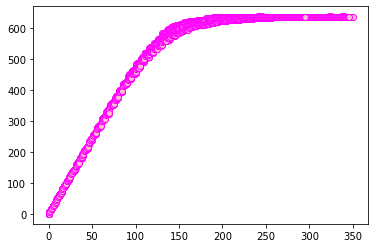

In [7]:
coleccion(personas = 10, graf = True) #3.7

In [8]:
coleccion(personas = 15) #6.8

[200, 235, 255, 210, 210, 250, 260, 250, 255, 290, 235, 515, 230, 355, 400]

Para tener un "marco teórico" del cual aferrarnos para ver si las simulaciones son un poco acertadas, podemos tomar como referencia esta gráfica extraída de Infobae [https://www.infobae.com/economia/2022/08/24/el\-album\-del\-mundial\-2022\-como\-es\-la\-mejor\-estrategia\-para\-llenarlo\-al\-costo\-mas\-bajo/](https://www.infobae.com/economia/2022/08/24/el-album-del-mundial-2022-como-es-la-mejor-estrategia-para-llenarlo-al-costo-mas-bajo/)  

![](.version_con_clases.ipynb.upload/paste-0.4901361070947712)



### Comparación entre la cantidad de sobres y coleccionistas intercambiando entre sí

A continuación compararemos la cantidad de sobres necesarios para completar el álbum en función a la cantidad de los coleccionistas intercambiando entre sí.  



In [9]:
# Llevó 125seg aprox 2min, con 9 personas y 10 repeticiones.
# Llevó 300seg aprox 5 min, con 19 personas y 5 repeticiones.
datos = []
personas = []
for i in range(1, 19):
    aux = []
    for j in range(0, 5):
        aux.append(np.mean(coleccion(i)))
    datos.append(np.mean((aux)))
    personas.append(i)

Text(0.5, 1.0, 'Comparación entre cantidad de sobres y coleccionistas intercambiando entre sí.')

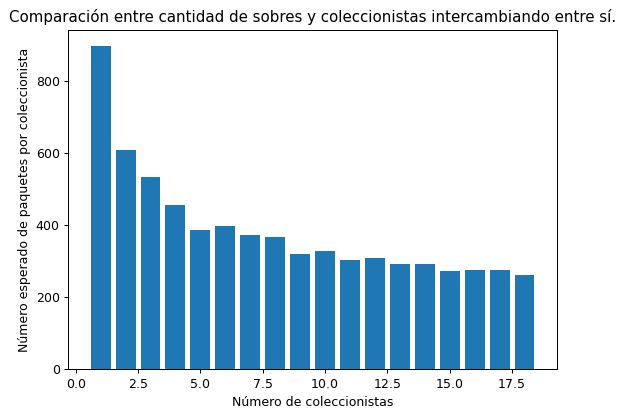

In [10]:
fig, axes = plt.subplots(figsize=(7,5), dpi=90)
plt.bar(personas, datos)
plt.ylabel('Número esperado de paquetes por coleccionista')
plt.xlabel('Número de coleccionistas')
plt.title('Comparación entre cantidad de sobres y coleccionistas intercambiando entre sí.')

In [13]:
# Llevó 125seg aprox 2min, con 9 personas y 10 repeticiones.
# Llevó 300seg aprox 5 min, con 19 personas y 5 repeticiones.
datos = []
personas = []
for i in range(1, 10):
    aux = []
    for j in range(0, 5):
        aux.append(np.mean(coleccion(i)))
    datos.append(np.mean((aux)))
    personas.append(i)

Text(0.5, 1.0, 'Comparación entre cantidad de sobres y coleccionistas intercambiando entre sí.')

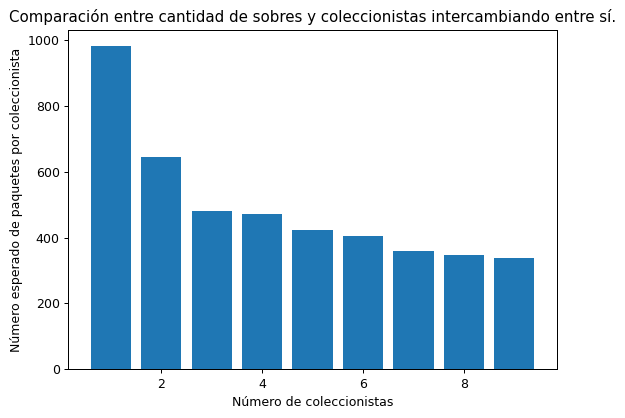

In [14]:
fig, axes = plt.subplots(figsize=(7,5), dpi=90)
plt.bar(personas, datos)
plt.ylabel('Número esperado de paquetes por coleccionista')
plt.xlabel('Número de coleccionistas')
plt.title('Comparación entre cantidad de sobres y coleccionistas intercambiando entre sí.')

**Los algoritmos llevan un tiempo considerable cuando simulamos una cantidad grande de personas, por eso elegimos paralelizar la simulación para que consuma menos tiempo \(tiempo de vida, no de maquina\)**  



In [9]:
def promedios(funcion, personas:list=[1], repeticiones:int=5, graficar:bool=True):
    """
    Repite 'repeticiones' veces una colección para cada persona en 'personas'.

    ARGUMENTOS:

    * "funcion" -- función a promediar.

    * "personas" -- lista que representa con cuántas personas de repetirá cada simulación.

    * "repeticiones" -- entero que representa cuántas veces se repetirá cada simulación.

    SALIDA:

    Un gráfico de barras comparativo entre los promedios de sobres necesarios por personas.

    """
    prom = [] # Lista que almacenará los promedios para cada persona.
    for i in personas:
        valores = [i for j in range(repeticiones)]
        pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
        resultados = pool.map(funcion, valores)
        prom.append(np.mean(resultados))
    if graficar:
        fig, axes = plt.subplots(figsize=(7,5), dpi=90)
        plt.bar(personas, prom)
        plt.ylabel('Número esperado de paquetes por coleccionista')
        plt.xlabel('Número de coleccionistas')
        plt.title('Comparación entre cantidad de sobres y coleccionistas intercambiando entre sí.')
    else:
        return prom

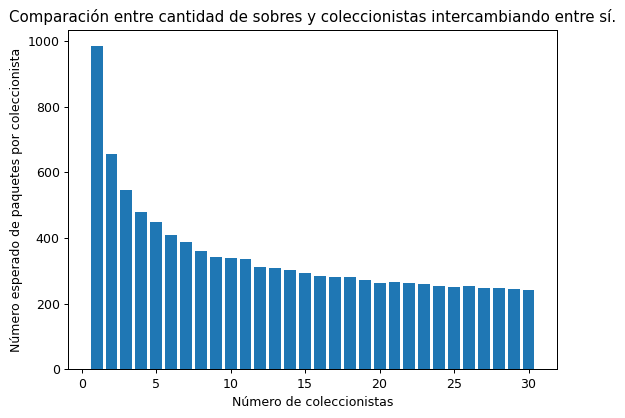

In [59]:
promedios(coleccion, personas=[i for i in range(1,31)], repeticiones=30) # 703 seg

## <span style='color:#2196f3'>Conclusión algoritmo 2:</span>

###### Vemos que a medida que aumenta el número de personas la esperanza de llenado disminuye. La diferencia entre 1 persona y 2 personas es mucha más que la de 10 y 20 que no difieren tanto. Observamos también que tiene que haber una asintota en y = 134 porque es imposible llenar el album con menos sobres.



## <span style='color:#16a5a5'>Algoritmo 3: Figuritas con distintos valores</span>



A continuación se define la clase`ColeccionistaValor` que es utilizada para representar un coleccionista de figuritas cuando éstas tienen un valor de intercambio entre 1 y 4. Su clase padre es`Coleccionista`y el cambio más sustancial es que se le agregan los atibutos para cada mazo de figuritas repetidas y faltantes simples, dobles, triples y cuádruples. Además se definen nuevos métodos.

Nuevos atributos:

- `repetidas_simples, repetidas_dobles, repetidas_triples`y`repetidas_cuadruples`listas que lleva el control de las figuritas repetidas con valor 1, 2, 3 y 4.
- `faltantes_simples, faltantes_dobles, faltantes_triples`y`faltantes_cuadruples`listas que lleva el control de las figuritas faltantes con valor 1, 2, 3 y 4.

Nuevos métodos:

- `intercambiar(coleccionista, otro_coleccionista)` Este se actualiza para que intercambie figuritas de mazos de repetidas de igual valor entre dos coleccionistas.
- `intercambiar_cruzado(coleccionista, otro_coleccionista)`Intercambia las figuritas de mazos cruzados de dos coleccionistas, siempre respetando el valor de cada figurita \(ej: triples con dobles, cuádruples con simples, etc\).  



In [5]:
### -------------------------------------------------------------------------- ###
### Coleccionista sin repetidas en sobres y repetidas con un valor entre 1 y 4 ###
### -------------------------------------------------------------------------- ###

class ColeccionistaValor(Coleccionista):
    """
    Simula una colección de figuritas donde cada repetida tiene un valor entre 1 y 4. No vienen figuritas repetidas en un mismo sobre.

    ARGUMENTOS (todos son opcionales):

    * "fig" -- (por defecto 670) cantidad de figuritas diferentes necesarias para llenar el álbum.

    * "fig_sob" -- (por defecto 5) cantidad de figuritas que vienen en cada sobre.

    * "sob" -- (por defecto 5) cantidad de sobres comprados por turno.

    * "lista_valores" -- (por defecto [2, 29, 170, 469]) lista de listas que representa cuántas figuritas tienen asignadas un mismo valor. Específicamente:

                         * en lista_valores[0] se almacena cuántas figuritas tienen valor de intercambio 4.
                         * en lista_valores[1] se almacena cuántas figuritas tienen valor de intercambio 3.
                         * en lista_valores[2] se almacena cuántas figuritas tienen valor de intercambio 2.
                         * en lista_valores[3] se almacena cuántas figuritas tienen valor de intercambio 1.

                         Notar que sum(lista_valores) = fig.

    SALIDA:

    Un entero que representa la cantidad de sobres que se necesitaron para completar el álbum.

    NOTA:

    Ejecutar ColeccionistaValor() es equivalente a ejecutar:

    ColeccionistaValor(fig=670, fig_sob=5, sob=5, lista_valores=[2, 29, 170, 469]).

    """
    def __init__(self, fig:int = 670, fig_sob:int = 5, sob:int = 5, lista_valores:list = [2, 29, 170, 469]):
        self._fig = fig # Cantidad de figuritas que hay en el álbum.
        self._fig_sob = fig_sob # Cantidad de figuritas que vienen por sobre.
        self._sob = sob # Cantidad de sobres comprados por turno.
        self.album = [0 for i in range(0, fig)] # Cada celda representa cuántas veces tiene esa figurita en ese lugar del álbum.
        self.cant_sob = 0 # Cantidad de sobres que necesitó el coleccionista para completar el álbum.
        self._lista_valores = lista_valores # Lista de listas que representa el valor de cada figurita.
        self._necesarias = [i for i in range(0, fig)] # Figuritas necesarias para completar el álbum.
        self.cant_fig = [0] # Cantidad de figuritas pegadas sobre a sobre.

        self._fig_simples = range(lista_valores[0] + lista_valores[1] + lista_valores[2],
                                  lista_valores[0] + lista_valores[1] + lista_valores[2] + lista_valores[3]) # Lista de figuritas con valor 1.
        self._fig_dobles = range(lista_valores[0] + lista_valores[1], lista_valores[0] + lista_valores[1] + lista_valores[2]) # Lista de figuritas con valor 2.
        self._fig_triples = range(lista_valores[0], lista_valores[0] + lista_valores[1]) # Lista de figuritas con valor 3.
        self._fig_cuadruples = range(0, lista_valores[0]) # Lista de figuritas con valor 4.

        self.repetidas_simples = [] # Lista que contiene las figuritas repetidas con valor 1.
        self.repetidas_dobles = [] # Lista que contiene las figuritas repetidas con valor 2.
        self.repetidas_triples = [] # Lista que contiene las figuritas repetidas con valor 3.
        self.repetidas_cuadruples = [] # Lista que contiene las figuritas repetidas con valor 4.

        self.faltantes_simples = [i for i in self._fig_simples] # Lista que contiene las figuritas faltantes con valor 1.
        self.faltantes_dobles = [i for i in self._fig_dobles] # Lista que contiene las figuritas faltantes con valor 2.
        self.faltantes_triples = [i for i in self._fig_triples]  # Lista que contiene las figuritas faltantes con valor 3.
        self.faltantes_cuadruples = [i for i in self._fig_cuadruples]  # Lista que contiene las figuritas faltantes con valor 4.

    def act_repetidas(self):
        self.repetidas_simples = [i for i in self._fig_simples if self.album[i] > 1]
        self.repetidas_dobles = [i for i in self._fig_dobles if self.album[i] > 1]
        self.repetidas_triples = [i for i in self._fig_triples if self.album[i] > 1]
        self.repetidas_cuadruples = [i for i in self._fig_cuadruples if self.album[i] > 1]

    def act_faltantes(self):
        self.faltantes_simples = [i for i in self._fig_simples if self.album[i] == 0]
        self.faltantes_dobles = [i for i in self._fig_dobles if self.album[i] == 0]
        self.faltantes_triples = [i for i in self._fig_triples if self.album[i] == 0]
        self.faltantes_cuadruples = [i for i in self._fig_cuadruples if self.album[i] == 0]

    def __intercambiar_cada(self, other, other_repetidas_valor, self_faltantes_valor,
                       self_repetidas_valor, other_faltantes_valor):
        """
        Intercambia mazos de repetidas de igual valor entre dos coleccionistas.

        EJEMPLOS DE EJECUCIÓN:

        * Para intercambiar simples con simples:
            x.__intercambiar_cada(y, y.repetidas_simples, x.faltantes_simples,
                               x,repetidas_simples, y.faltantes_simples

        """
        fal_self = Set(other_repetidas_valor) & Set(self_faltantes_valor) # Repetidas de other que le faltan a self.
        fal_other = Set(self_repetidas_valor) & Set(other_faltantes_valor) # Repetidas de self que le faltan a other.
        min_inter = min(fal_self.cardinality(), fal_other.cardinality())

        if ((fal_self & fal_other) != Set()):
            for i in range(0, min_inter):
                other.album[fal_self[i]] = other.album[fal_self[i]] - 1 # Le sacamos a other la figurita que intercambiará con self.
                self.album[fal_self[i]] = 1 # Pegamos la figurita de other en el álbum de self.
                self.album[fal_other[i]] = self.album[fal_other[i]] - 1 # Le sacamos a self la figurita que intercambiará con other.
                other.album[fal_other[i]] = 1 # Pegamos la figurita de self en el álbum de other.

    def intercambiar(self, other):
        """
        Intercambia mazos de repetidas de igual valor entre dos coleccionistas.
        """
        # Intercambio de figuritas simples:
        self.__intercambiar_cada(other, other.repetidas_simples, self.faltantes_simples,
                            self.repetidas_simples, other.faltantes_simples)
        # Intercambio de figuritas dobles:
        self.__intercambiar_cada(other, other.repetidas_dobles, self.faltantes_dobles,
                            self.repetidas_dobles, other.faltantes_dobles)
        # Intercambio de figuritas triples:
        self.__intercambiar_cada(other, other.repetidas_triples, self.faltantes_triples,
                            self.repetidas_triples, other.faltantes_triples)
        # Intercambio de figuritas cuadruples:
        self.__intercambiar_cada(other, other.repetidas_cuadruples, self.faltantes_cuadruples,
                            self.repetidas_cuadruples, other.faltantes_cuadruples)
        # Actualizamos las repetidas y faltantes de cada coleccionista
        self.act_repetidas()
        self.act_faltantes()
        other.act_repetidas()
        other.act_faltantes()


    def __cambio(self, other, a: int,b: list): # a es la que le falta a other. b es una lista de fig que le faltan a self.
        self.album[a] = self.album[a] - 1 # Le sacamos a self la figurita que intercambiará con other.
        other.album[a] += 1 # Pegamos la figurita de self en el album de other.
        for i in b:
            other.album[i] = other.album[i] - 1 # Le sacamos a other la figurita que intercambiará con self.
            self.album[i] += 1 # Pegamos la figurita de other en el álbum de self.


    def __intercambiar_valor(self, other, self_rep_A, self_fal_B, other_rep_B, other_fal_A, max_val):
        """
        A tiene que ser más grande que B.

        max_val = valor de las figuritas en el mazo self_rep_A
        """
        a = Set(self_rep_A) & Set(other_fal_A) # Repetidas de self que le faltan a other con valor A
        b = Set(self_fal_B) & Set(other_rep_B) # Repetidas de other que le faltan a self con valor B
        c = min(a.cardinality(), b.cardinality()//max_val)
        for i in range (0,c):
            self.__cambio(other,a[i],b[i*max_val : i*max_val + max_val-1])


    def __intercambiar_cruzado(self, other, val_self, val_other):
        """
        Intercambia figuritas de mazos cruzados de dos coleccionistas. Es decir que, por ejemplo, puede intercambiar las triples de un coleccionista por las dobles del otro (siempre se respetan los valores de las figuritas.)

        ARGUMENTOS:

        * "self, other" -- coleccionistas que intercambiaran las figuritas.

        * "val_self" -- valor de las figuritas del mazo de self (debe de ser mayor estricto a 1).

        * "val_other" -- valor de las figuritas del mazo de other. Este valor SIEMPRE debe de ser menor estricto al de val_self. Para intercambiar mazos de igual valor utilizar intercambiar(self, other).
        """
        ### Capturando errores ###
        if val_self <= 1:
            raise ValueError("El valor de val_self debe de ser mayor estricto a 1.")

        if val_self <= val_other or val_other < 0:
            raise ValueError('El valor de val_other debe de ser mayor a 0 y menor estricto a val_self.')

        ### Cuerpo principal ###
        if val_self == 4:
            if val_other == 3:
                self.__intercambiar_valor(other, self.repetidas_cuadruples, self.faltantes_triples,
                                          other.repetidas_triples, other.faltantes_cuadruples, 4)
            elif val_other == 2:
                self.__intercambiar_valor(other, self.repetidas_cuadruples, self.faltantes_dobles,
                                          other.repetidas_dobles, other.faltantes_cuadruples, 4)
            else: # val_other = 1
                self.__intercambiar_valor(other, self.repetidas_cuadruples, self.faltantes_simples,
                                          other.repetidas_simples, other.faltantes_cuadruples, 4)

        elif val_self == 3:
            if val_other == 2:
                self.__intercambiar_valor(other, self.repetidas_triples, self.faltantes_dobles,
                                          other.repetidas_dobles, other.faltantes_triples, 3)
            else: # val_other = 1
                self.__intercambiar_valor(other, self.repetidas_triples, self.faltantes_simples,
                                          other.repetidas_simples, other.faltantes_triples, 3)
        else: # val_self = 2
            self.__intercambiar_valor(other, self.repetidas_dobles, self.faltantes_simples,
                                      other.repetidas_simples, other.faltantes_dobles, 2)



    def intercambiar_cruzado(self, other):
        """
        Intercambia las figuritas de mazos cruzados de dos coleccionistas, siempre respetando el valor de cada figurita.
        """
        for val_self in range(2, 5):
            for val_other in range(1, val_self):
                self.__intercambiar_cruzado(other, val_self, val_other)

        for val_other in range(2, 5):
            for val_self in range(1, val_other):
                other.__intercambiar_cruzado(self, val_other, val_self)

A continuación se define la clase`ColeccionistaValorRepetidas`que es una clase hija de`ColeccionistaValor`. La única diferencia con su clase padre es en cómo define la función de abrir sobres: ahora se pueden encontrar figuritas repetidas en un mismo sobre.  



In [6]:
### -------------------------------------------------------------------------- ###
### Coleccionista con repetidas en sobres y repetidas con un valor entre 1 y 4 ###
### -------------------------------------------------------------------------- ###

class ColeccionistaValorRepetidas(ColeccionistaValor):
    """
    Simula una colección de figuritas donde cada repetida tiene un valor entre 1 y 4. Pueden haber figuritas repetidas en un mismo sobre.

    ARGUMENTOS (todos son opcionales):

    * "fig" -- (por defecto 670) cantidad de figuritas diferentes necesarias para llenar el álbum.

    * "fig_sob" -- (por defecto 5) cantidad de figuritas que vienen en cada sobre.

    * "sob" -- (por defecto 5) cantidad de sobres comprados por turno.

    * "lista_valores" -- (por defecto [2, 29, 170, 469]) lista de listas que representa cuántas figuritas tienen asignadas un mismo valor. Específicamente:

                         * en lista_valores[0] se almacena cuántas figuritas tienen valor de intercambio 4.
                         * en lista_valores[1] se almacena cuántas figuritas tienen valor de intercambio 3.
                         * en lista_valores[2] se almacena cuántas figuritas tienen valor de intercambio 2.
                         * en lista_valores[3] se almacena cuántas figuritas tienen valor de intercambio 1.

                         Notar que sum(lista_valores) = fig.

    SALIDA:

    Un entero que representa la cantidad de sobres que se necesitaron para completar el álbum.

    NOTA:

    Ejecutar ColeccionistaValorRepetidas() es equivalente a ejecutar:

    ColeccionistaValorRepetidas(fig=670, fig_sob=5, sob=5, lista_valores=[2, 29, 170, 469]).

    """
    # Solo cambia que en los sobres pueden haber repetidas.
    def abrir_sobre(self):
            return random.choices(self._necesarias, k=self._fig_sob)

## Función para simular coleccionistas con figuritas repetidas con un valor entre 1 y 4:



In [11]:
### ----------------------------------------------------------------------- ###
### Función para colección cuando las repetidas tienen un valor entre 1 y 4 ###
### ----------------------------------------------------------------------- ###

def coleccion_valor(personas:int = 1, fig:int = 670, fig_sob:int = 5, sob:int = 5,
                    rep_sob:bool = False, graf:bool = False, lista_valores:list = [2, 29, 170, 469]):
    """
    Simula la colección de varias "personas" intercambiando figuritas entre sí, donde las repetidas tienen un valor entre 1 y 4.

    ARGUMENTOS:

    * "personas" -- cantidad de personas que coleccionarán el álbum de manera simultánea, intercambiando figuritas entre sí.

    * "fig" -- cantidad de figuritas diferentes necesarias para llenar el álbum.

    * "fig_sob" -- cantidad de figuritas que vienen en cada sobre.

    * "sob" -- cantidad de sobres comprados por turno.

    * "rep_sob" -- (booleano) representa si en cada sobre pueden encontrarse figuritas repetidas. Este argumento es opcional y está predefinido en "False".

    * "graf" -- (booleano) representa si se imprime una gráfica que representa la cantidad de figuritas diferentes obtenidas en función del tiempo. Este argumento es opcional y está predefinido en "False".

    * "lista_valores" -- lista de listas que representa cuántas figuritas tienen asignadas un mismo valor. Específicamente:

                         * en lista_valores[0] se almacena cuántas figuritas tienen valor de intercambio 4.
                         * en lista_valores[1] se almacena cuántas figuritas tienen valor de intercambio 3.
                         * en lista_valores[2] se almacena cuántas figuritas tienen valor de intercambio 2.
                         * en lista_valores[3] se almacena cuántas figuritas tienen valor de intercambio 1.

                         Por defecto lista_valores = [2, 29, 170, 469].

    SALIDA:

    Un lista que representa la cantidad de sobres que necesitó cada coleccionista para completar el álbum.

    En caso de que "graf" sea "True" incluirá una gráfica que representa la cantidad de figuritas diferentes obtenidas en función del tiempo.

    NOTA:

    Ejecutar coleccion_valor() es equivalente a ejecutar:

    coleccion_valor(personas=1, fig=670, fig_sob=5, sob=5,
                    rep_sob=False, graf=False,
                    lista_valores=[2, 29, 170, 469])

    """
    ### Función auxiliar ###
    def llenado_grupal(M):
        for i in range(0, personas):
            if M[i].completo() == False:
                return False
        return True

    ### Definiendo los coleccionistas ###
    if rep_sob: # Si los sobres pueden contener repetidas:
        M = [ColeccionistaValorRepetidas(fig, fig_sob, sob, lista_valores) for i in range(0, personas)]
    else: # Si los sobres no pueden contener repetidas.
        M = [ColeccionistaValor(fig, fig_sob, sob, lista_valores) for i in range(0, personas)]

    ### Código principal ###
    while not llenado_grupal(M):
        for coleccionista in M:
            if not coleccionista.completo():
                coleccionista.pegar_fig()
                coleccionista.act_repetidas()
                coleccionista.act_faltantes()
                # Intercambios:
                for otro_coleccionista in M:
                    if otro_coleccionista != coleccionista: # No va a intercambiar figuritas con sí mismo
                        coleccionista.intercambiar(otro_coleccionista)
                        coleccionista.intercambiar_cruzado(otro_coleccionista)

    ### Gráfica ###
    if graf:
        for coleccionista in M:
            plt.plot(coleccionista.cant_fig, color='magenta', marker='o',mfc='pink' )

    ### Salida ###
    return [coleccionista.cant_sob for coleccionista in M]

A continuación simularemos cuántos sobres se necesitan para completar el álbum si se pertenece a un grupo de 5 coleccionistas:  



In [9]:
coleccion_valor(personas=5)

[690, 730, 785, 665, 1200]

Veremos qué tanto afecta el factor de que puedan encontrarse repetidas en un mismo sobre:  



In [10]:
coleccion_valor(personas=5, rep_sob=True)

[610, 685, 875, 645, 915]

¿Cuál es el promedio de sobres necesarios si se intercambian las figuritas repetidas entre 5 coleccionistas donde cada figurita tiene un valor entre 1 y 4?  



In [12]:
promedios(coleccion_valor, personas=[5], repeticiones=20, graficar=False) # 16.9 seg.

[817.7]

No es un valor muy alentador. Al aumentar el número de coleccionistas no bajó significativamente la cantidad de sobres necesarios para completar el álbum, como sí pasó cuando las repetidas se cambiaban 1:1.  

Veamos el gráfico de barras que compara la cantidad de sobres esperada en función al número de coleccionistas:  



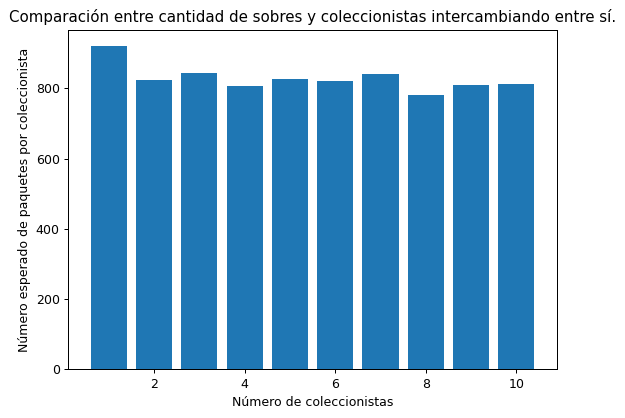

In [21]:
promedios(coleccion_valor, personas=[1,2,3,4,5,6,7,8,9,10], repeticiones=10)

### <span style='color:#009ce0'>Conclusión Algoritmo 3:</span>

Gráficamente lo podemos notar con claridad: cuando las figuritas tienen valor es prácticamente lo mismo coleccionar solo que cambiar las repetidas. Pero esto no lo podemos afirmar del todo, hay que tener en cuenta las siguientes consideraciones:

- Por cómo está implementado el código, solamente se intercambian repetidas de a dos mazos a la vez es decir, que se intercambian dobles con dobles, dobles con triples, simples con cuádruples... Pero se deja afuera la posibilidad de, por ejemplo, cambiar una cuádruple por dos simples y una doble. Sabemos que en realidad podía darse casos de este estilo y esto no está reflejado en las simulaciones. Desconocemos con qué tanta frecuencia ocurren estos intercambios y por ello no podemos definir qué tan probable sea un reflejo de la realidad estas simulaciones.
- Muchas veces ocurre que algunos coleccionistas que completaron su álbum son bastantes amables y por ayudar a otro coleccionista dan sus figuritas repetidas y reciben a cambio cualquier combinación de figuritas \(pues ya tiene todas\). Nuevamente desconocemos con qué frecuencia pasa esto \(estimamos que baja en general pero entre grupos de amigos puede ser alta\) y por lo tanto también podría ser un factor clave que afecta la precisión de la simulación.
- En la vida real la cantidad de personas con las que uno puede intercambiar es casi ilimitada, mientras que aca es un numero fijo y constante. Esto haría que varíe la esperanza, y además teniendo en cuenta que el valor de la figurita puede cambiar según la persona.

Usamos el modelo de esta manera porque es imposible considerar todas las alternativas y se vuelve computacionalmente muy pesado.  

